(-0.5, 3015.5, 4031.5, -0.5)

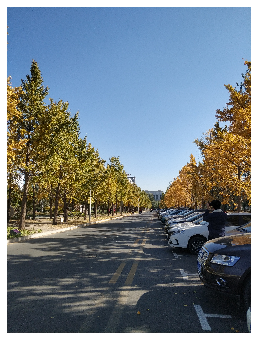

In [9]:
%matplotlib inline
import imageio
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)
pic = imageio.imread('../Image/tree.jpg')
plt.figure(figsize = (6,6))
plt.imshow(pic)
plt.axis('off')

(-0.5, 3015.5, 4031.5, -0.5)

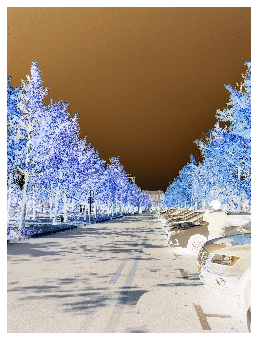

In [11]:
negative = 255 - pic
plt.figure(figsize=(6,6))
plt.imshow(negative)
plt.axis('off')

(-0.5, 3015.5, 4031.5, -0.5)

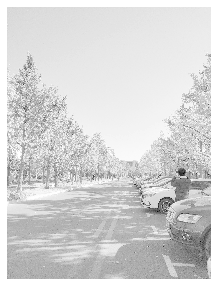

In [16]:
import numpy as np
gray = lambda rgb : np.dot(rgb[... , :3], [0.299, 0.587, 0.114])
gray = gray(pic)
max_ = np.max(gray)
def log_transform():
    return (255/np.log(1+max_)) * np.log(1+gray)
plt.figure(figsize = (5,5))
plt.imshow(log_transform(), cmap = plt.get_cmap(name = 'gray'))
plt.axis('off')